# $3^{rd}$ exercise

## Notebook setup

#### Used libraries

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#### Reading and printing config files

In [2]:
def LoadConfig(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = val
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))

#### Colors, just for fun

In [3]:
bgp = "#191724"
txt = "#e0def4"
err = "#908caa"
er2 = "#6e6a86"
lmn = "#eb6f92"

## 03.1 - Montecarlo simulation of the european call&put-option prices

**Goal:** Computing the call-option and put-option prices at the initial time and compare this solution to the one obtained analitically with black-scholes theory. each option price is simulated in two ways: sampling directly he final asset price at time `T` and dividing the interval $[0,T]$ into `N_INTERVALS` subintervals and evaluating the price at each step.

**Expectations:**  Given the parameters indicated in the next session:<br>
Call-option price: 14.975790778311286 <br>
Put-option price :  5.4595325819072364

**Methodological notes:** We use the datablocking method to evaluate statistical uncertainties.

###  Parameters
We set the initial price to `S0`, the delivery time to `T`, the strike price to `STRIKE_PRICE`. We suppose to have an intrest rate `INTREST_RATE` and a volatility `SIGMA` -with:

In [4]:
c1=LoadConfig("in/031-options-conf.inl")
PrintConf(c1)


S0                 100
T                  1
STRIKE_PRICE       100
INTREST_RATE       0.1
SIGMA              0.25


For the datablocking we used `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each -with:

In [5]:
c2=LoadConfig("in/031-datablocking-conf.inl")
PrintConf(c2)

N_BLOCKS           100
STEPS_PER_BLOCK    1000
N_INTERVALS        100


For the discretized computation of the final price we divided the interval $[0,T]$ into `N_INTERVALS` subintervals -with:

### Results
#### Call-option price

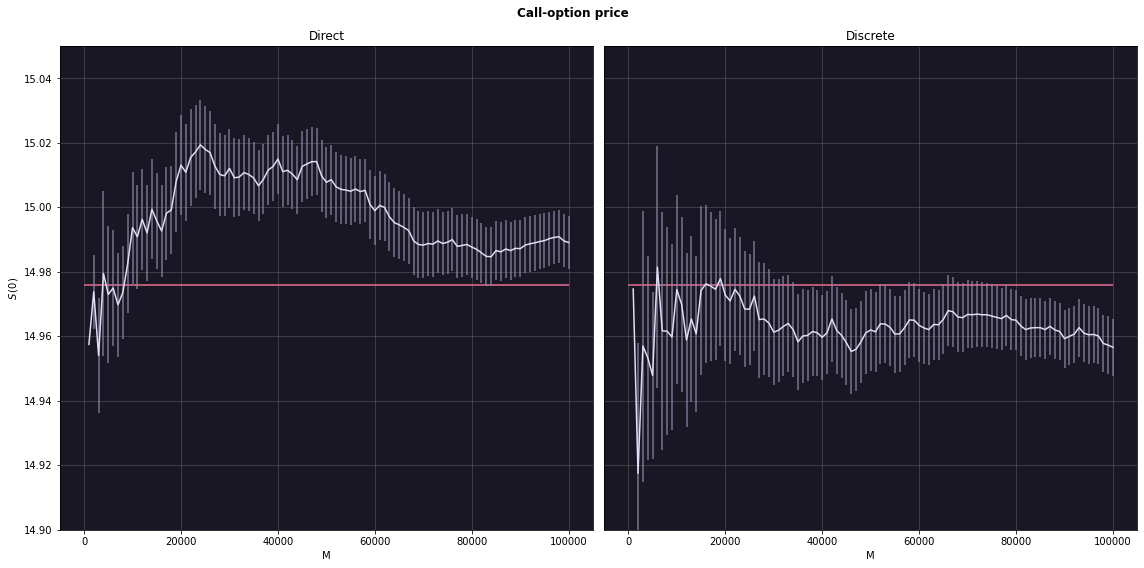

In [30]:
y_inf=14.90
y_sup=15.05

fig=plt.figure(figsize=(16, 8))
plt.suptitle('Call-option price', weight='bold')

#direct 
data = np.genfromtxt("out/031-callopt_direct.csv", delimiter=",", skip_header=1)
data[:,0]*=int(c2['STEPS_PER_BLOCK'])

plt.subplot(121)
fig.axes[0].set_facecolor(bgp)

cop = 14.975790778311286
plt.ylim(y_inf,y_sup)
plt.hlines(cop, 0, int(c2['STEPS_PER_BLOCK'])*int(c2["N_BLOCKS"]),color=lmn)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.errorbar(data[:,0],data[:,3],color=txt)

plt.xlabel('M')
plt.ylabel('$S\,(0)$')
plt.title("Direct")
plt.grid(alpha=0.3)

#discrete 
data = np.genfromtxt("out/031-callopt_discrete.csv", delimiter=",", skip_header=1)
data[:,0]*=int(c2['STEPS_PER_BLOCK'])

plt.subplot(122)
fig.axes[1].set_facecolor(bgp)

plt.ylim(y_inf,y_sup)
plt.hlines(cop, 0, int(c2['STEPS_PER_BLOCK'])*int(c2["N_BLOCKS"]),color=lmn)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.errorbar(data[:,0],data[:,3],color=txt)

plt.tick_params(left=False,labelleft=False)
plt.xlabel('M')
plt.title("Discrete")
plt.grid(alpha=0.3)

plt.tight_layout()


plt.show()

#### Put-option price

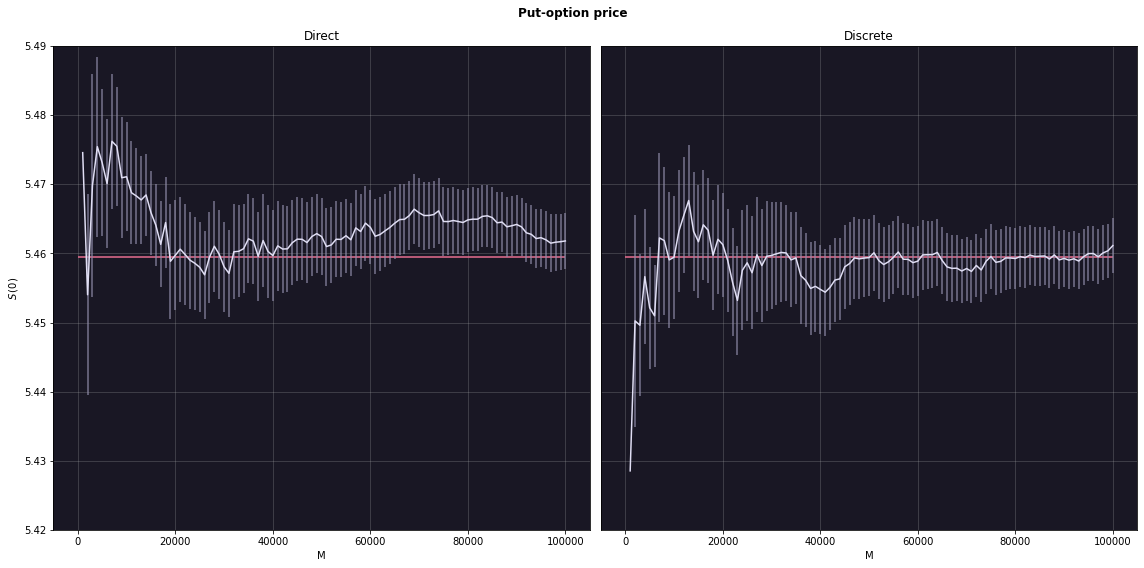

In [29]:
y_inf=5.42
y_sup=5.49

fig=plt.figure(figsize=(16, 8))
plt.suptitle('Put-option price', weight='bold')

#direct 
data = np.genfromtxt("out/031-putopt_direct.csv", delimiter=",", skip_header=1)
data[:,0]*=int(c2['STEPS_PER_BLOCK'])

plt.subplot(121)
fig.axes[0].set_facecolor(bgp)

pop = 5.4595325819072364
plt.ylim(y_inf, y_sup)
plt.hlines(pop, 0, int(c2['STEPS_PER_BLOCK'])*int(c2["N_BLOCKS"]),color=lmn)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.errorbar(data[:,0],data[:,3],color=txt)

plt.xlabel('M')
plt.ylabel('$S\,(0)$')
plt.title("Direct")
plt.grid(alpha=0.3)

#discrete 
data = np.genfromtxt("out/031-putopt_discrete.csv", delimiter=",", skip_header=1)
data[:,0]*=int(c2['STEPS_PER_BLOCK'])

plt.subplot(122)
fig.axes[1].set_facecolor(bgp)

plt.ylim(y_inf, y_sup)
plt.hlines(pop, 0, int(c2['STEPS_PER_BLOCK'])*int(c2["N_BLOCKS"]),color=lmn)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.errorbar(data[:,0],data[:,3],color=txt)

plt.tick_params(left=False,labelleft=False)
plt.xlabel('M')
plt.title("Discrete")
plt.grid(alpha=0.3)

plt.tight_layout()


plt.show()

### Conclusion
Results confirm our expectations